<a href="https://colab.research.google.com/github/sendmail123/DataScience/blob/master/Pytorch/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [0]:
import torch


In [0]:
w=torch.tensor(3.0,requires_grad=True)
b = torch.tensor(1.0,requires_grad=True)




In [0]:
def forward(x):
  y=w*x+b
  return y

In [5]:
forward(2.0)

tensor(7., grad_fn=<AddBackward0>)

In [6]:
x=torch.tensor([[2],[7]])
forward(x)

tensor([[ 7.],
        [22.]], grad_fn=<AddBackward0>)

In [0]:
from torch.nn import Linear

In [8]:
torch.manual_seed(1)

In [9]:
model = Linear(in_features=1,out_features=1)
print(model.weight,model.bias)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [10]:
x=torch.tensor([[2.0],[3.3]])
model(x)

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)

In [0]:
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


Text(0, 0.5, 'y')

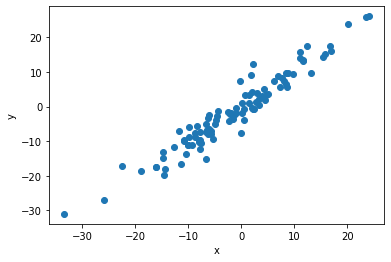

In [12]:
x = torch.randn(100,1)*10
y=x+torch.randn(100,1)*3
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')

In [0]:
class LR(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear=nn.Linear(input_size,output_size)

  def forward(self,x):
    pred = self.linear(x)
    return pred


In [14]:
torch.manual_seed(1)
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [0]:
[w,b] = model.parameters()

In [0]:
def get_params():
  return(w[0][0].item(),b[0].item())

In [0]:
def plot_fit(title):
  plt.title(title)
  w1,b1 = get_params()
  x1=np.array([-30,30])
  y1=w1*x1 + b1
  plt.plot(x1,y1,'r')
  plt.scatter(x,y)
  plt.show()

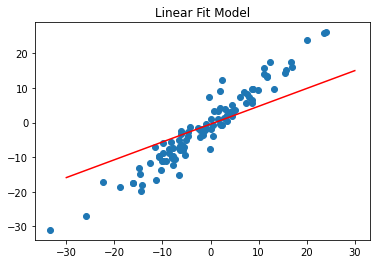

In [18]:
plot_fit('Linear Fit Model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
epochs = 100


In [20]:
losses=[]
for i in range(epochs):
  y_pred = model.forward(x)
  loss=criterion(y_pred,y)
  print("epochs: ",i,"loss: ", loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()  #Gradient Calculation
  optimizer.step()





epochs:  0 loss:  36.448333740234375
epochs:  1 loss:  43.94552230834961
epochs:  2 loss:  53.461822509765625
epochs:  3 loss:  65.5404281616211
epochs:  4 loss:  80.8705062866211
epochs:  5 loss:  100.32701110839844
epochs:  6 loss:  125.0198745727539
epochs:  7 loss:  156.35787963867188
epochs:  8 loss:  196.1288604736328
epochs:  9 loss:  246.60162353515625
epochs:  10 loss:  310.6553955078125
epochs:  11 loss:  391.9438781738281
epochs:  12 loss:  495.1044006347656
epochs:  13 loss:  626.0213623046875
epochs:  14 loss:  792.162353515625
epochs:  15 loss:  1003.0047607421875
epochs:  16 loss:  1270.5738525390625
epochs:  17 loss:  1610.131591796875
epochs:  18 loss:  2041.0474853515625
epochs:  19 loss:  2587.8994140625
epochs:  20 loss:  3281.8857421875
epochs:  21 loss:  4162.58251953125
epochs:  22 loss:  5280.22705078125
epochs:  23 loss:  6698.5712890625
epochs:  24 loss:  8498.50390625
epochs:  25 loss:  10782.72265625
epochs:  26 loss:  13681.4970703125
epochs:  27 loss:  173

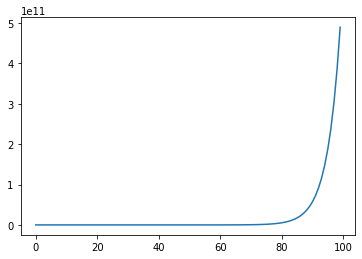

In [21]:
plt.plot(range(epochs),losses)